# Introduction to CNN Keras 
### **Nagaraju Kuruva**
#### 22/04/2020

* **1. Introduction**
* **2. Data preparation**
    * 2.1 Load data and check basic statistics of data
    * 2.2 Check for null, missing values and special charcters in data
    * 2.3 Normalization
    * 2.4 Reshape
    * 2.5 Label encoding
    * 2.6 Split training and valdiation set
* **3. CNN**
    * 3.1 Define the model
    * 3.2 Set the optimizer and annealer
    * 3.3 Data augmentation
* **4. Evaluate the model**
    * 4.1 Training and validation curves
* **5. Prediction and submition**
    * 5.1 Predict and Submit results

# Problem Statement

MNIST ("Modified National Institute of Standards and Technology") is the de facto “hello world” dataset of computer vision. Since its release in 1999, this classic dataset of handwritten images has served as the basis for benchmarking classification algorithms. As new machine learning techniques emerge, MNIST remains a reliable resource for researchers and learners alike.

In this competition, our goal is to correctly identify digits from a dataset of tens of thousands of handwritten images.

Reference Link : https://www.kaggle.com/c/digit-recognizer/overview

# 1. Introduction


## <a>What are Neural Networks </a>

Neural networks are a type of machine learning models which are designed to operate similar to biological neurons and human nervous system. These models are used to recognize complex patterns and relationships that exists within a labelled dataset. They have following properties:

1. The core architecture of a Neural Network model is comprised of a large number of simple processing nodes called Neurons which are interconnected and organized in different layers. 

2. An individual node in a layer is connected to several other nodes in the previous and the next layer. The inputs form one layer are received and processed to generate the output which is passed to the next layer.

3. The first layer of this architecture is often named as input layer which accepts the inputs, the last layer is named as the output layer which produces the output and every other layer between input and output layer is named is hidden layers. 

![](https://i.imgur.com/McMOhuQ.png)

### Key concepts in a Neural Network 

#### A. Neuron:

A Neuron is a single processing unit of a Neural Network which are connected to different other neurons in the network. These connections repersents inputs and ouputs from a neuron. To each of its connections, the neuron assigns a “weight” (W) which signifies the importance the input and adds a bias (b) term. 

![](https://miro.medium.com/max/888/1*cmg8u0Asyx0RFQQNkRwKMg.png)

#### B. Activation Functions 

The activation functions are used to apply non-linear transformation on input to map it to output. The aim of activation functions is to predict the right class of the target variable based on the input combination of variables. Some of the popular activation functions are Relu, Sigmoid, and TanH. 

![](https://www.researchgate.net/profile/Vivienne_Sze/publication/315667264/figure/fig3/AS:669951052496900@1536740186369/Various-forms-of-non-linear-activation-functions-Figure-adopted-from-Caffe-Tutorial.png)

#### C. Forward Propagation 

Neural Network model goes through the process called forward propagation in which it passes the computed activation outputs in the forward direction. 

Z = W*X + b   
A = g(Z) 

- g is the activation function 
- A is the activation using the input 
- W is the weight associated with the input 
- B is the bias associated with the node 

![](https://www.bogotobogo.com/python/scikit-learn/images/NeuralNetwork2-Forward-Propagation/NN-with-components-w11-etc.png)

#### D. Error Computation: 

The neural network learns by improving the values of weights and bias. The model computes the error in the predicted output in the final layer which is then used to make small adjustments the weights and bias. The adjustments are made such that the total error is minimized. Loss function measures the error in the final layer and cost function measures the total error of the network. 

Loss = Actual_Value - Predicted_Value   

Cost = Summation (Loss)   

#### E. Backward Propagation: 

Neural Network model undergoes the process called backpropagation in which the error is passed to backward layers so that those layers can also improve the associated values of weights and bias. It uses the algorithm called Gradient Descent in which the error is minimized and optimal values of weights and bias are obtained. This weights and bias adjustment is done by computing the derivative of error, derivative of weights, bias and subtracting them from the original values. 

![](https://miro.medium.com/max/1400/1*LB10KFg5J7yK1MLxTXcLdQ.jpeg)

<br>

<br>

###  Convolutional Neural Networks 

In Convolutional Neural Networks, every image input is treated as a a matrix of pixel values which represents the amount of darkness at a given pixel in the image. Unlike, tradational neural networks which treats an image as a one dimentional network, CNNs considers the location of pixels and the neighbours for classification.

<br>

![](http://www.mdpi.com/information/information-07-00061/article_deploy/html/images/information-07-00061-g001.png)

<br>

### Key components of Convolutional Neural Network. 

**A. Convolutional layer:** In this layer, a kernel (or weight) matrix is used to extract low level features from the images. The kernel with its weights rotates over the image matrix in a sliding window fashion in order to obtained the convolved output. The kernel matrix behaves like a filter in an image extracting particular information from the original image matrix. During the colvolution process, The weights are learnt such that the loss function is minimized.

![](https://ds055uzetaobb.cloudfront.net/brioche/uploads/MDyKhb5tXY-1_hbp1vrfewnareprrlnxtqq2x.png?width=500)

**B. Stride:** Stride is defined as the number of steps the kernel or the weight matrix takes while moving across the entire image moving N pixel at a time. If the weight matrix moves N pixel at a time, it is called stride of N.

![](http://deeplearning.net/software/theano/_images/numerical_padding_strides.gif) 

**C. Pooling Layer:**  Pooling layers are used to extract the most informative features from the generated convolved output.It reduces the size of the data and most commonly used poolings are max pooling,average pooling.

Ex: Max Pooling

![](https://upload.wikimedia.org/wikipedia/commons/e/e9/Max_pooling.png)

**D. Output Layer:** To generate the final output, a dense or a fully connected layer is applied with the softmax activation function. Softmax function is used to generate the probabilities for each class of the target variable. 

**E. Dropout:** In machine learning, regularization is way to prevent over-fitting. Regularization reduces over-fitting by adding a penalty to the loss function. By adding this penalty, the model is trained such that it does not learn interdependent set of features weights.Dropout is an approach to regularization in neural networks which helps reducing interdependent learning amongst the neurons.

![](https://miro.medium.com/max/1200/1*iWQzxhVlvadk6VAJjsgXgg.png)

**F. Flatten:** Flattening is converting the data into a 1-dimensional array for inputting it to the next layer. We flatten the output of the convolutional layers to create a single long feature vector. And it is connected to the final classification model, which is called a fully-connected layer. In other words, we put all the pixel data in one line and make connections with the final layer.

![](https://sds-platform-private.s3-us-east-2.amazonaws.com/uploads/73_blog_image_1.png)

**G. Optimizer:** Optimization algorithms helps us to minimize (or maximize) an Objective function (another name for Error function).

![](https://miro.medium.com/max/578/1*65Mxg_Yfq-L7AvaS0K5aGA.png)

**H. Data augmentation:** Data augmentation is the process of increasing the amount and diversity of data. We do not collect new data, rather we transform the already present data. 

   **Need for data augmentation:** Data augmentation is an integral process in deep learning, as in deep learning we need large amounts of data and in some cases it is not feasible to collect thousands or millions of images, so data augmentation comes to the rescue.The most commonly used operations are Rotation,Shearing,Zooming,Cropping,Flipping,Changing the brightness level.

**Original Image**   
<img src="https://media.geeksforgeeks.org/wp-content/uploads/20190904224635/original2.jpg"></img>

**Rotation with 40 degress**
<img src="https://media.geeksforgeeks.org/wp-content/uploads/20190904223915/rotate1.jpeg"></img>

**Zooming**
<img src="https://media.geeksforgeeks.org/wp-content/uploads/20190904223919/zoom1.jpeg"></img>

**Flipping**
<img src="https://media.geeksforgeeks.org/wp-content/uploads/20190904223910/flip1.jpeg"></img>

**Changing Brightness Level**
<img src="https://media.geeksforgeeks.org/wp-content/uploads/20190904224635/original2.jpg"></img>

**I. Call back/Early stopping:** Too many epochs can lead to overfitting of the training dataset, whereas too few may result in an underfit model. Early stopping is a method that allows you to specify an arbitrary large number of training epochs and stop training once the model performance stops improving on a hold out validation dataset.

<img src="https://www.mdpi.com/sensors/sensors-19-05180/article_deploy/html/images/sensors-19-05180-g002.png"></img> 

**J. Normalization:**  We perform a grayscale normalization to reduce the effect of illumination's differences.Moreover the CNN converg faster on [0..1] data than on [0..255].

**K. Reshape:** In Keras the Convolution layer requirest an additional dimension which will be used for the various filter.Most convolutional neural networks are designed in a way so that they can only accept images of a fixed size. This creates several challenges during data acquisition and model deployment. The common practice to overcome this limitation is to reshape the input images so that they can be fed into the networks. Many standard pre-trained networks and datasets come with a provision of working with square images.

Ex: Reshape image in 3 dimensions (height = 28px, width = 28px , chanel = 1).reshaped 784px vectors to 28x28x3 3D matrices.
![](https://i.stack.imgur.com/nfYtQ.jpg)

**L. OneHotEncoding:** Many machine learning algorithms cannot work with categorical data directly. The categories must be converted into numbers. This is required for both input and output variables that are categorical.OneHoorEncoding refers to splitting the column which contains numerical categorical data to many columns depending on the number of categories present in that column. Each column contains “0” or “1” corresponding to which column it has been placed.

![](https://i.imgur.com/mtimFxh.png)

**M. Padding:** In order to assist the kernel with processing the image, padding is added to the frame of the image to allow for more space for the kernel to cover the image. Adding padding to an image processed by a CNN allows for more accurate analysis of images.

Ex: For an (8 x 8) image and (3 x 3) filter, the output resulting after convolution operation would be of size (6 x 6). Thus, the image shrinks every time a convolution operation is performed. This places an upper limit to the number of times such an operation could be performed before the image reduces to nothing thereby precluding us from building deeper networks.
Also, the pixels on the corners and the edges are used much less than those in the middle.

![](https://media.geeksforgeeks.org/wp-content/uploads/20190721011218/Screenshot-2019-07-16-at-1.35.20-AM.png)

Clearly, pixel A is touched in just one convolution operation and pixel B is touched in 3 convolution operations, while pixel C is touched in 9 convolution operations. In general, pixels in the middle are used more often than pixels on corners and edges. Consequently, the information on the borders of images are not preserved as well as the information in the middle.
To overcome these problems, we use padding.

![](https://s3-us-west-2.amazonaws.com/static.pyimagesearch.com/keras-conv2d/keras_conv2d_padding.gif)

**N.Batch Size:** The batch size defines the number of samples that will be propagated through the network.

Ex: Let's say you have 1050 training samples and you want to set up a batch_size equal to 100. The algorithm takes the first 100 samples (from 1st to 100th) from the training dataset and trains the network. Next, it takes the second 100 samples (from 101st to 200th) and trains the network again. We can keep doing this procedure until we have propagated all samples through of the network. Problem might happen with the last set of samples. In our example, we've used 1050 which is not divisible by 100 without remainder. The simplest solution is just to get the final 50 samples and train the network.

**Advantages :** It requires less memory. Since you train the network using fewer samples, the overall training procedure requires less memory. That's especially important if you are not able to fit the whole dataset in your machine's memory.

Typically networks train faster with mini-batches. That's because we update the weights after each propagation. In our example we've propagated 11 batches (10 of them had 100 samples and 1 had 50 samples) and after each of them we've updated our network's parameters. If we used all samples during propagation we would make only 1 update for the network's parameter.

![](https://3qeqpr26caki16dnhd19sv6by6v-wpengine.netdna-ssl.com/wp-content/uploads/2018/11/Line-Plots-of-Classification-Accuracy-on-Train-and-Test-Datasets-With-Different-Batch-Sizes.png)

**O. Epoch:** An epoch describes the number of times the algorithm sees the entire data set. So, each time the algorithm has seen all samples in the dataset, an epoch has completed.

![](https://www.researchgate.net/profile/Ruimin_Ke/publication/323625412/figure/fig3/AS:614088652623879@1523421552170/CNN-Model-accuracy-curves-train-and-test-during-the-100-epoch-training-process.png)

**P. Iteration:** The number of forward passes (The number of batches that you have created) that your network has to do in order to complete one epoch (i.e., going over all training instances) is called Iteration.

<br>

## <a> Implement a Convolutional Neural Network </a>  

This is a 5 layers Sequential Convolutional Neural Network for digits recognition trained on MNIST dataset. I have choosed to build it with keras API (Tensorflow backend) which is very intuitive. Firstly, I will prepare the data (handwritten digits images) then i will focus on the CNN modeling and evaluation.

I achieved 99% of accuracy with this CNN.

This Notebook follows three main parts:

* The data preparation
* The CNN modeling and evaluation
* The results prediction and submission

In [30]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # For Visualization
import matplotlib.image as mpimg # To display image
import seaborn as sns # For Visualization
# Magic Command
%matplotlib inline 

np.random.seed(2)

from sklearn.model_selection import train_test_split # Splitting train data into train and validation
import itertools

from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential # Sequeencial model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D # Convolution Network layers
from keras.optimizers import RMSprop # Optimizer
from keras.preprocessing.image import ImageDataGenerator # Image Augmentation
from keras.callbacks import ReduceLROnPlateau # Call backs/Early stopping


sns.set(style='white', context='notebook', palette='deep') # Set aesthetic parameters in one step.

In [31]:
## set max how many rows and columns you want to display in jupyter notebook
pd.options.display.max_columns = 200 
pd.get_option('display.max_rows') 
pd.set_option('display.max_rows',None) 

# 2. Data preparation
## 2.1 Load data and check basic statistics of data

In [21]:
## Get the file path and file name from kaggel 
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/test.csv
/kaggle/input/digit-recognizer/train.csv


In [33]:
# Load the train and test data
train = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')
test = pd.read_csv('/kaggle/input/digit-recognizer/test.csv')

In [23]:
# Check dimensions of train
train.shape

(42000, 785)

In [24]:
# Check dimensions of test
test.shape

(28000, 784)

In [5]:
# Get first 5 rows from train data
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
# Get first 5 rows from test data
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
# Get last 5 rows from train data
train.tail()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41999,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
# Get last 5 rows from teste data
test.tail()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
27995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27999,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
# Check data types for train
train.dtypes

label       int64
pixel0      int64
pixel1      int64
pixel2      int64
pixel3      int64
pixel4      int64
pixel5      int64
pixel6      int64
pixel7      int64
pixel8      int64
pixel9      int64
pixel10     int64
pixel11     int64
pixel12     int64
pixel13     int64
pixel14     int64
pixel15     int64
pixel16     int64
pixel17     int64
pixel18     int64
pixel19     int64
pixel20     int64
pixel21     int64
pixel22     int64
pixel23     int64
pixel24     int64
pixel25     int64
pixel26     int64
pixel27     int64
pixel28     int64
pixel29     int64
pixel30     int64
pixel31     int64
pixel32     int64
pixel33     int64
pixel34     int64
pixel35     int64
pixel36     int64
pixel37     int64
pixel38     int64
pixel39     int64
pixel40     int64
pixel41     int64
pixel42     int64
pixel43     int64
pixel44     int64
pixel45     int64
pixel46     int64
pixel47     int64
pixel48     int64
pixel49     int64
pixel50     int64
pixel51     int64
pixel52     int64
pixel53     int64
pixel54   

In [26]:
# Check data types for test
test.dtypes

pixel0      int64
pixel1      int64
pixel2      int64
pixel3      int64
pixel4      int64
pixel5      int64
pixel6      int64
pixel7      int64
pixel8      int64
pixel9      int64
pixel10     int64
pixel11     int64
pixel12     int64
pixel13     int64
pixel14     int64
pixel15     int64
pixel16     int64
pixel17     int64
pixel18     int64
pixel19     int64
pixel20     int64
pixel21     int64
pixel22     int64
pixel23     int64
pixel24     int64
pixel25     int64
pixel26     int64
pixel27     int64
pixel28     int64
pixel29     int64
pixel30     int64
pixel31     int64
pixel32     int64
pixel33     int64
pixel34     int64
pixel35     int64
pixel36     int64
pixel37     int64
pixel38     int64
pixel39     int64
pixel40     int64
pixel41     int64
pixel42     int64
pixel43     int64
pixel44     int64
pixel45     int64
pixel46     int64
pixel47     int64
pixel48     int64
pixel49     int64
pixel50     int64
pixel51     int64
pixel52     int64
pixel53     int64
pixel54     int64
pixel55   

In [27]:
# Check column name for train
train.columns

Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=785)

In [28]:
# Check column names for test
test.columns

Index(['pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6',
       'pixel7', 'pixel8', 'pixel9',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=784)

In [14]:
# Check statistics for Train
train.describe(include='all')

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [15]:
# Check statistics for Test
test.describe(include='all')

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,...,28000.000000,28000.000000,28000.000000,28000.000000,28000.000000,28000.0,28000.0,28000.0,28000.0,28000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.164607,0.073214,0.028036,0.011250,0.006536,0.0,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.473293,3.616811,1.813602,1.205211,0.807475,0.0,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,253.000000,254.000000,193.000000,187.000000,119.000000,0.0,0.0,0.0,0.0,0.0


In [16]:
# Check the index value for Train
train.index

RangeIndex(start=0, stop=42000, step=1)

In [17]:
# Check the index value for Test
test.index

RangeIndex(start=0, stop=28000, step=1)

In [34]:
# Seperate target from train data
Y_train = train["label"]

# Drop 'label' column (or) store features/independent columns 
X_train = train.drop(labels = ["label"],axis = 1) 

# Get each label count
Y_train.value_counts()

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

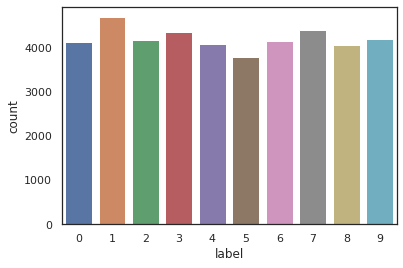

In [35]:
# Plot graph for each label Vs Count
g = sns.countplot(Y_train)

## 2.2 Check for null, missing values and special charcters in data

In [37]:
# Check null values for train data
X_train.isnull().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

In [36]:
X_train.isna().sum()

pixel0      0
pixel1      0
pixel2      0
pixel3      0
pixel4      0
pixel5      0
pixel6      0
pixel7      0
pixel8      0
pixel9      0
pixel10     0
pixel11     0
pixel12     0
pixel13     0
pixel14     0
pixel15     0
pixel16     0
pixel17     0
pixel18     0
pixel19     0
pixel20     0
pixel21     0
pixel22     0
pixel23     0
pixel24     0
pixel25     0
pixel26     0
pixel27     0
pixel28     0
pixel29     0
pixel30     0
pixel31     0
pixel32     0
pixel33     0
pixel34     0
pixel35     0
pixel36     0
pixel37     0
pixel38     0
pixel39     0
pixel40     0
pixel41     0
pixel42     0
pixel43     0
pixel44     0
pixel45     0
pixel46     0
pixel47     0
pixel48     0
pixel49     0
pixel50     0
pixel51     0
pixel52     0
pixel53     0
pixel54     0
pixel55     0
pixel56     0
pixel57     0
pixel58     0
pixel59     0
pixel60     0
pixel61     0
pixel62     0
pixel63     0
pixel64     0
pixel65     0
pixel66     0
pixel67     0
pixel68     0
pixel69     0
pixel70     0
pixel7

In [38]:
# Check null values for test
test.isnull().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

In [39]:
test.isna().sum()

pixel0      0
pixel1      0
pixel2      0
pixel3      0
pixel4      0
pixel5      0
pixel6      0
pixel7      0
pixel8      0
pixel9      0
pixel10     0
pixel11     0
pixel12     0
pixel13     0
pixel14     0
pixel15     0
pixel16     0
pixel17     0
pixel18     0
pixel19     0
pixel20     0
pixel21     0
pixel22     0
pixel23     0
pixel24     0
pixel25     0
pixel26     0
pixel27     0
pixel28     0
pixel29     0
pixel30     0
pixel31     0
pixel32     0
pixel33     0
pixel34     0
pixel35     0
pixel36     0
pixel37     0
pixel38     0
pixel39     0
pixel40     0
pixel41     0
pixel42     0
pixel43     0
pixel44     0
pixel45     0
pixel46     0
pixel47     0
pixel48     0
pixel49     0
pixel50     0
pixel51     0
pixel52     0
pixel53     0
pixel54     0
pixel55     0
pixel56     0
pixel57     0
pixel58     0
pixel59     0
pixel60     0
pixel61     0
pixel62     0
pixel63     0
pixel64     0
pixel65     0
pixel66     0
pixel67     0
pixel68     0
pixel69     0
pixel70     0
pixel7

In [7]:
### this method will return number of levels,null values,unique values,data types

def Observations(df):
    return(pd.DataFrame({'dtypes' : df.dtypes,
                         'levels' : [df[x].unique() for x in df.columns],
                         'null_values' : df.isna().sum(),
                         'Unique Values': df.nunique()
        
    }))

In [8]:
# Get number of levels,null values,unique values,data types for train
Observations(X_train)

,dtypes,levels,null_values,Unique Values
pixel0,int64,[0],0,1
pixel1,int64,[0],0,1
pixel2,int64,[0],0,1
pixel3,int64,[0],0,1
pixel4,int64,[0],0,1
pixel5,int64,[0],0,1
pixel6,int64,[0],0,1
pixel7,int64,[0],0,1
pixel8,int64,[0],0,1
pixel9,int64,[0],0,1


In [9]:
# Get number of levels,null values,unique values,data types for test
Observations(test)

,dtypes,levels,null_values,Unique Values
pixel0,int64,[0],0,1
pixel1,int64,[0],0,1
pixel2,int64,[0],0,1
pixel3,int64,[0],0,1
pixel4,int64,[0],0,1
pixel5,int64,[0],0,1
pixel6,int64,[0],0,1
pixel7,int64,[0],0,1
pixel8,int64,[0],0,1
pixel9,int64,[0],0,1


I check for corrupted images (missing values inside).

There is no missing values in the train and test dataset. So we can safely go ahead.

In [27]:
## below logic is used for checking special charcter in numeric columns

def specialCharcterVerification(data):
    for col in data.columns: 
        print('\n',col,'----->')
        for index in range(1,len(data)):
            try:
                #skip=float(data.loc[index,col])
                skip=int(data.loc[index,col])
            except ValueError :
                print(index,data.loc[index,col])
            

In [28]:
# Check special charcters in train data
specialCharcterVerification(train)


 label ----->

 pixel0 ----->

 pixel1 ----->

 pixel2 ----->

 pixel3 ----->

 pixel4 ----->

 pixel5 ----->

 pixel6 ----->

 pixel7 ----->

 pixel8 ----->

 pixel9 ----->

 pixel10 ----->

 pixel11 ----->

 pixel12 ----->

 pixel13 ----->

 pixel14 ----->

 pixel15 ----->

 pixel16 ----->

 pixel17 ----->

 pixel18 ----->

 pixel19 ----->

 pixel20 ----->

 pixel21 ----->

 pixel22 ----->

 pixel23 ----->

 pixel24 ----->

 pixel25 ----->

 pixel26 ----->

 pixel27 ----->

 pixel28 ----->

 pixel29 ----->

 pixel30 ----->

 pixel31 ----->

 pixel32 ----->

 pixel33 ----->

 pixel34 ----->

 pixel35 ----->

 pixel36 ----->

 pixel37 ----->

 pixel38 ----->

 pixel39 ----->

 pixel40 ----->

 pixel41 ----->

 pixel42 ----->

 pixel43 ----->

 pixel44 ----->

 pixel45 ----->

 pixel46 ----->

 pixel47 ----->

 pixel48 ----->

 pixel49 ----->

 pixel50 ----->

 pixel51 ----->

 pixel52 ----->

 pixel53 ----->

 pixel54 ----->

 pixel55 ----->

 pixel56 ----->

 pixel57 ----->

 pixel58

In [29]:
# Check special charcters in test data
specialCharcterVerification(test)


 pixel0 ----->

 pixel1 ----->

 pixel2 ----->

 pixel3 ----->

 pixel4 ----->

 pixel5 ----->

 pixel6 ----->

 pixel7 ----->

 pixel8 ----->

 pixel9 ----->

 pixel10 ----->

 pixel11 ----->

 pixel12 ----->

 pixel13 ----->

 pixel14 ----->

 pixel15 ----->

 pixel16 ----->

 pixel17 ----->

 pixel18 ----->

 pixel19 ----->

 pixel20 ----->

 pixel21 ----->

 pixel22 ----->

 pixel23 ----->

 pixel24 ----->

 pixel25 ----->

 pixel26 ----->

 pixel27 ----->

 pixel28 ----->

 pixel29 ----->

 pixel30 ----->

 pixel31 ----->

 pixel32 ----->

 pixel33 ----->

 pixel34 ----->

 pixel35 ----->

 pixel36 ----->

 pixel37 ----->

 pixel38 ----->

 pixel39 ----->

 pixel40 ----->

 pixel41 ----->

 pixel42 ----->

 pixel43 ----->

 pixel44 ----->

 pixel45 ----->

 pixel46 ----->

 pixel47 ----->

 pixel48 ----->

 pixel49 ----->

 pixel50 ----->

 pixel51 ----->

 pixel52 ----->

 pixel53 ----->

 pixel54 ----->

 pixel55 ----->

 pixel56 ----->

 pixel57 ----->

 pixel58 ----->

 pixel

## 2.3 Normalization

We perform a grayscale normalization to reduce the effect of illumination's differences. 

Moreover the CNN converg faster on [0..1] data than on [0..255].

In [35]:
# Normalize the train and test data
X_train = X_train / 255.0
test = test / 255.0

## 2.3 Reshape

In [36]:
# Reshape image in 3 dimensions (height = 28px, width = 28px , chanel = 1)
X_train = X_train.values.reshape(-1,28,28,1) # The -1 can be thought of as a flexible value for the library to fill in for you. The restriction here would be that the inner-most shape of the Tensor should be (28, 28, 1). Beyond that, the library can adjust things as needed. In this case, that would be the # of examples in a batch.
test = test.values.reshape(-1,28,28,1)

Train and test images (28px x 28px) has been stock into pandas.Dataframe as 1D vectors of 784 values. We reshape all data to 28x28x1 3D matrices. 

Keras requires an extra dimension in the end which correspond to channels. MNIST images are gray scaled so it use only one channel. For RGB images, there is 3 channels, we would have reshaped 784px vectors to 28x28x3 3D matrices. 

## 2.5 Label encoding ( One Hot Encoding )

In [37]:
# Encode labels to one hot vectors (ex : 2 -> [0,0,1,0,0,0,0,0,0,0])
Y_train = to_categorical(Y_train, num_classes = 10)

Labels are 10 digits numbers from 0 to 9. We need to encode these lables to one hot vectors (ex : 2 -> [0,0,1,0,0,0,0,0,0,0]).

## 2.6 Split training and valdiation set 

In [38]:
# Split the train and the validation set for the fitting
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.1, random_state=2)

I choosed to split the train set in two parts : a small fraction (10%) became the validation set which the model is evaluated and the rest (90%) is used to train the model.

Since we have 42 000 training images of balanced labels (see 2.1 Load data), a random split of the train set doesn't cause some labels to be over represented in the validation set. Be carefull with some unbalanced dataset a simple random split could cause inaccurate evaluation during the validation. 


We can get a better sense for one of these examples by visualising the image and looking at the label.

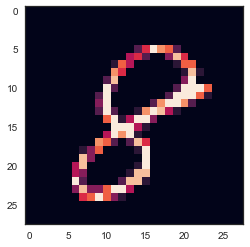

In [14]:
# Some examples
g = plt.imshow(X_train[0][:,:,0])

C:\Users\nagar\Anaconda3\lib\site-packages\matplotlib\text.py:1150: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


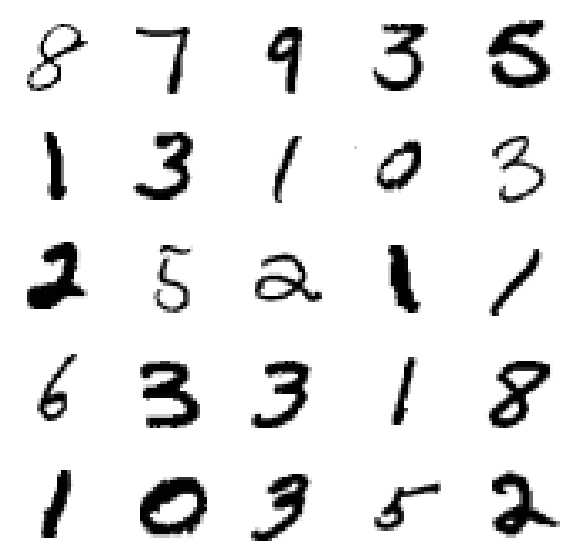

In [18]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i].reshape(28, 28), cmap=plt.cm.binary)
    plt.xlabel(Y_train[i])
    plt.axis('off')
plt.show()

# 3. CNN
## 3.1 Define the model

I used the Keras Sequential API, where you have just to add one layer at a time, starting from the input.

The first is the convolutional (Conv2D) layer. It is like a set of learnable filters. I choosed to set 32 filters for the two firsts conv2D layers and 64 filters for the two last ones. Each filter transforms a part of the image (defined by the kernel size) using the kernel filter. The kernel filter matrix is applied on the whole image. Filters can be seen as a transformation of the image.

The CNN can isolate features that are useful everywhere from these transformed images (feature maps).

The second important layer in CNN is the pooling (MaxPool2D) layer. This layer simply acts as a downsampling filter. It looks at the 2 neighboring pixels and picks the maximal value. These are used to reduce computational cost, and to some extent also reduce overfitting. We have to choose the pooling size (i.e the area size pooled each time) more the pooling dimension is high, more the downsampling is important. 

Combining convolutional and pooling layers, CNN are able to combine local features and learn more global features of the image.

Dropout is a regularization method, where a proportion of nodes in the layer are randomly ignored (setting their wieghts to zero) for each training sample. This drops randomly a propotion of the network and forces the network to learn features in a distributed way. This technique also improves generalization and reduces the overfitting. 

'relu' is the rectifier (activation function max(0,x). The rectifier activation function is used to add non linearity to the network. 

The Flatten layer is use to convert the final feature maps into a one single 1D vector. This flattening step is needed so that you can make use of fully connected layers after some convolutional/maxpool layers. It combines all the found local features of the previous convolutional layers.

In the end i used the features in two fully-connected (Dense) layers which is just artificial an neural networks (ANN) classifier. In the last layer(Dense(10,activation="softmax")) the net outputs distribution of probability of each class.

In [39]:
# Set the CNN model 
# my CNN architechture is In -> [[Conv2D->relu]*2 -> MaxPool2D -> Dropout]*2 -> Flatten -> Dense -> Dropout -> Out

# Sequential model
model = Sequential()

# Convolution layer with feature map size 5X5,32 filters,input shape 28X28X1,Relu Activation function
model.add(Conv2D(filters = 32, #  Integer, the dimensionality of the output space (i.e. the number of output filters in the convolution).
                 kernel_size = (5,5), # An integer or tuple/list of 2 integers, specifying the height and width of the 2D convolution window.Can be a single integer to specify the same value for 1all spatial dimensions.
                 padding = 'Same', # one of `"valid"` or `"same"`  
                 activation ='relu',# Activation function.If you don't specify anything, no activation is applied
                 input_shape = (28,28,1))) # input shapes(28X28X1)

# Convolution layer with feature map size 5X5,32 filters,Relu Activation function
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))

# Maxpooling layer with kernal size 2X2,default stride (pool_size)
model.add(MaxPool2D(pool_size=(2,2)))

# Droput 25% Nodes
model.add(Dropout(0.25))

# Convolution layer with feature map size 3X3,64 filters,Relu Activation function
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))

# Convolution layer with feature map size 3X3,64 filters,Relu Activation function
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))

# Maxpooling layer with kernal size 2X2,Stride 2X2
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))

# Droput 25% Nodes
model.add(Dropout(0.25))

# Convert 2D data into 1D data
model.add(Flatten())

# Fully connected layer with 256 output shape,Relu Activation function
model.add(Dense(256, activation = "relu"))

# Dropouts 50% Nodes
model.add(Dropout(0.5))

# Fully connnected layer with 10 output shape,Softmax activation function
model.add(Dense(10, activation = "softmax"))

## 3.2 Set the optimizer and annealer

Once our layers are added to the model, we need to set up a score function, a loss function and an optimisation algorithm.

We define the loss function to measure how poorly our model performs on images with known labels. It is the error rate between the oberved labels and the predicted ones. We use a specific form for categorical classifications (>2 classes) called the "categorical_crossentropy".

The most important function is the optimizer. This function will iteratively improve parameters (filters kernel values, weights and bias of neurons ...) in order to minimise the loss. 

I choosed RMSprop (with default values), it is a very effective optimizer. The RMSProp update adjusts the Adagrad method in a very simple way in an attempt to reduce its aggressive, monotonically decreasing learning rate.
We could also have used Stochastic Gradient Descent ('sgd') optimizer, but it is slower than RMSprop.

The metric function "accuracy" is used is to evaluate the performance our model.
This metric function is similar to the loss function, except that the results from the metric evaluation are not used when training the model (only for evaluation).

In [40]:
# Define the RMSprop optimizer with leaning rate 0.001,
optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)

In [41]:
# Compile the model
model.compile(optimizer = optimizer , # String (name of optimizer) or optimizer instance.
              loss = "categorical_crossentropy", # String (name of objective function) or objective function or`Loss` instance. 
              metrics=["accuracy"]) # List of metrics to be evaluated by the model during training and testing.

In order to make the optimizer converge faster and closest to the global minimum of the loss function, i used an annealing method of the learning rate (LR).

The LR is the step by which the optimizer walks through the 'loss landscape'. The higher LR, the bigger are the steps and the quicker is the convergence. However the sampling is very poor with an high LR and the optimizer could probably fall into a local minima.

Its better to have a decreasing learning rate during the training to reach efficiently the global minimum of the loss function. 

To keep the advantage of the fast computation time with a high LR, i decreased the LR dynamically every X steps (epochs) depending if it is necessary (when accuracy is not improved).

With the ReduceLROnPlateau function from Keras.callbacks, i choose to reduce the LR by half if the accuracy is not improved after 3 epochs.

In [42]:
# Set a learning rate annealer
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', # quantity to be monitored.
                                            patience=3, # number of epochs that produced the monitored quantity with no improvement after which training will be stopped. 
                                            verbose=1, # int. 0: quiet, 1: update messages.
                                            factor=0.5, # factor by which the learning rate will be reduced. new_lr = lr * factor
                                            min_lr=0.00001) # lower bound on the learning rate.

In [43]:
epochs = 30 # number of epochs to train a model
batch_size = 86 # number of sample to process at a time

## 3.3 Data augmentation 

In order to avoid overfitting problem, we need to expand artificially our handwritten digit dataset. We can make your existing dataset even larger. The idea is to alter the training data with small transformations to reproduce the variations occuring when someone is writing a digit.

For example, the number is not centered 
The scale is not the same (some who write with big/small numbers)
The image is rotated...

Approaches that alter the training data in ways that change the array representation while keeping the label the same are known as data augmentation techniques. Some popular augmentations people use are grayscales, horizontal flips, vertical flips, random crops, color jitters, translations, rotations, and much more. 

By applying just a couple of these transformations to our training data, we can easily double or triple the number of training examples and create a very robust model.

The improvement is important : 
   - Without data augmentation i obtained an accuracy of 97.34%
   - With data augmentation i achieved 99.55% of accuracy

In [ ]:
# Without data augmentation i obtained an accuracy of 0.98
#history = model.fit(X_train, Y_train, batch_size = batch_size, epochs = epochs, 
#          validation_data = (X_val, Y_val), verbose = 2)

In [44]:
# With data augmentation to prevent overfitting (accuracy 0.99)

datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images

# Fit data augmentation model
datagen.fit(X_train)

For the data augmentation, i choosed to :
   - Randomly rotate some training images by 10 degrees
   - Randomly  Zoom by 10% some training images
   - Randomly shift images horizontally by 10% of the width
   - Randomly shift images vertically by 10% of the height
   
I did not apply a vertical_flip nor horizontal_flip since it could have lead to misclassify symetrical numbers such as 6 and 9.

Once our model is ready, we fit the training dataset .

In [45]:
# Fit the model
history = model.fit_generator(datagen.flow(X_train, # Input data
                                           Y_train, # Labels/ Target
                                           batch_size=batch_size), # batch size (default: 32)
                              epochs = epochs, # Number of epochs to train the model.
                              validation_data = (X_val,Y_val), # on which to evaluate the loss and any model metrics at the end of each epoch. The model will not be trained on this data.
                              verbose = 2, # 0, 1, or 2. Verbosity mode 0 = silent, 1 = progress bar, 2 = one line per epoch.
                              steps_per_epoch=X_train.shape[0] // batch_size, # Total number of steps (batches of samples) to yield from `generator` before declaring one epoch finished and starting the next epoch. It should typically be equal to `ceil(num_samples / batch_size)`
                              callbacks=[learning_rate_reduction]) # List of callbacks to apply during training.

Epoch 1/30
 - 133s - loss: 0.4171 - accuracy: 0.8650 - val_loss: 0.0613 - val_accuracy: 0.9812
Epoch 2/30
 - 127s - loss: 0.1372 - accuracy: 0.9596 - val_loss: 0.0721 - val_accuracy: 0.9776
Epoch 3/30
 - 106s - loss: 0.1012 - accuracy: 0.9694 - val_loss: 0.0440 - val_accuracy: 0.9874
Epoch 4/30
 - 104s - loss: 0.0835 - accuracy: 0.9754 - val_loss: 0.0378 - val_accuracy: 0.9893
Epoch 5/30
 - 107s - loss: 0.0751 - accuracy: 0.9778 - val_loss: 0.0316 - val_accuracy: 0.9905
Epoch 6/30
 - 103s - loss: 0.0690 - accuracy: 0.9800 - val_loss: 0.0304 - val_accuracy: 0.9924
Epoch 7/30
 - 111s - loss: 0.0637 - accuracy: 0.9808 - val_loss: 0.0301 - val_accuracy: 0.9898
Epoch 8/30
 - 115s - loss: 0.0618 - accuracy: 0.9826 - val_loss: 0.0240 - val_accuracy: 0.9931
Epoch 9/30
 - 112s - loss: 0.0629 - accuracy: 0.9813 - val_loss: 0.0244 - val_accuracy: 0.9933
Epoch 10/30
 - 113s - loss: 0.0591 - accuracy: 0.9832 - val_loss: 0.0458 - val_accuracy: 0.9879
Epoch 11/30
 - 110s - loss: 0.0590 - accuracy: 0.

# 4. Evaluate the model
## 4.1 Training and validation curves

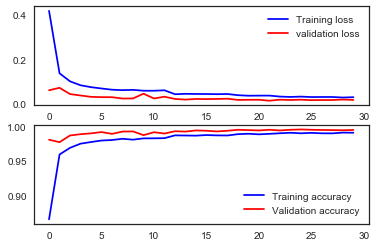

In [46]:
# Plot the loss and accuracy curves for training and validation 
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

In [47]:
# predict results
results = model.predict(test)
results


array([[2.2786292e-15, 1.6521400e-15, 1.0000000e+00, ..., 1.6545093e-10,
        1.1947217e-12, 3.5770146e-15],
       [9.9975818e-01, 3.6980185e-07, 6.5337995e-06, ..., 8.0660612e-07,
        3.0180709e-05, 8.6500397e-05],
       [3.0215574e-18, 1.6786837e-21, 8.5539469e-15, ..., 4.0156616e-14,
        1.4957798e-10, 1.0000000e+00],
       ...,
       [4.0670812e-26, 9.3939684e-20, 1.3384778e-14, ..., 1.2261842e-15,
        3.4420420e-15, 7.4876182e-18],
       [4.3483311e-10, 2.6612762e-11, 5.2820663e-09, ..., 1.5122736e-06,
        6.6045203e-08, 9.9999440e-01],
       [2.6934033e-17, 6.6909974e-18, 1.0000000e+00, ..., 4.1875691e-13,
        3.6551756e-12, 1.2522390e-16]], dtype=float32)

In [48]:
# select the indix with the maximum probability
results = np.argmax(results,axis = 1)
results

array([2, 0, 9, ..., 3, 9, 2], dtype=int64)

In [49]:
# create pandas array series to store result
results = pd.Series(results,name="Label")
results

0        2
1        0
2        9
3        0
4        3
5        7
6        0
7        3
8        0
9        3
10       5
11       7
12       4
13       0
14       4
15       3
16       3
17       1
18       9
19       0
20       9
21       1
22       1
23       5
24       7
25       4
26       2
27       7
28       4
29       7
30       7
31       5
32       4
33       2
34       6
35       2
36       5
37       5
38       1
39       6
40       7
41       7
42       4
43       9
44       8
45       7
46       8
47       2
48       6
49       7
50       6
51       8
52       8
53       3
54       8
55       2
56       1
57       2
58       2
59       0
60       4
61       1
62       7
63       0
64       0
65       0
66       1
67       9
68       0
69       1
70       6
71       5
72       8
73       8
74       2
75       8
76       9
77       9
78       2
79       3
80       5
81       4
82       1
83       8
84       9
85       2
86       4
87       3
88       6
89       7
90       2

In [50]:
results.name

'Label'

In [ ]:
# create a pandas data frame to append Image id and Label 
submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),results],axis = 1)

In [ ]:
# store results in csv file in current directory
submission.to_csv("cnn_submission.csv",index=False)